In [85]:
import pandas as pd
import numpy as np
import os

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [86]:
os.chdir(r'C:\Users\VISHNU\csv')

In [87]:
df = pd.read_csv('Fertilizer_Prediction.csv')

In [88]:
display(df.head(10))

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,Clayey,rice,DAP and MOP
1,28.69,96.65,178.96,6.08,4.0,4.0,4.0,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,5.01,4.0,4.0,2.0,silty clay,rice,MOP
3,25.07,95.02,192.90,5.55,2.0,2.1,3.5,sandy,Coconut,Urea and DAP
4,25.04,95.90,174.80,6.18,2.0,3.9,2.1,coastal,Coconut,Urea and MOP
5,20.82,84.13,230.22,6.46,2.5,4.0,3.0,clay loam,rice,Urea
6,25.95,93.41,172.05,5.84,2.5,4.0,2.0,alluvial,Coconut,Urea and MOP
7,26.49,80.16,242.86,6.98,4.2,2.3,3.2,Clayey,rice,DAP
8,25.01,95.59,165.81,6.00,2.0,3.9,2.1,coastal,Coconut,Urea and MOP
9,21.87,80.19,224.56,5.95,2.9,3.5,3.9,silty clay,rice,Urea


In [89]:
# To find Column name
df.columns

Index(['Temperature', 'Humidity', 'Rainfall', 'pH', 'N', 'P', 'K', 'Soil',
       'Crop', 'Fertilizer'],
      dtype='object')

In [90]:
# To find the number of rows and columns
print(df.shape)

# check for the data types, memory usage, etc
display(df.info())

(200, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  200 non-null    float64
 1   Humidity     200 non-null    float64
 2   Rainfall     200 non-null    float64
 3   pH           200 non-null    float64
 4   N            200 non-null    float64
 5   P            200 non-null    float64
 6   K            200 non-null    float64
 7   Soil         200 non-null    object 
 8   Crop         200 non-null    object 
 9   Fertilizer   200 non-null    object 
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


None

In [91]:
df

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,Clayey,rice,DAP and MOP
1,28.69,96.65,178.96,6.08,4.0,4.0,4.0,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,5.01,4.0,4.0,2.0,silty clay,rice,MOP
3,25.07,95.02,192.90,5.55,2.0,2.1,3.5,sandy,Coconut,Urea and DAP
4,25.04,95.90,174.80,6.18,2.0,3.9,2.1,coastal,Coconut,Urea and MOP
...,...,...,...,...,...,...,...,...,...,...
195,23.58,83.59,291.30,5.85,4.0,2.0,3.0,silty clay,rice,DAP
196,25.66,83.47,217.38,7.12,2.0,3.9,2.1,Clayey,rice,Urea and MOP
197,24.17,83.73,257.03,5.58,2.0,2.1,3.5,silty clay,rice,Urea and DAP
198,26.23,83.84,286.51,5.54,4.2,2.3,3.2,silty clay,rice,DAP


In [92]:
# checking the no. of missing values in the dataset
df.isnull().sum()

Temperature    0
Humidity       0
Rainfall       0
pH             0
N              0
P              0
K              0
Soil           0
Crop           0
Fertilizer     0
dtype: int64

In [93]:
import matplotlib.pyplot as plt # to visualize graph
%matplotlib inline 
import seaborn as sns # for better visualization of graph with the help of Matplotlib

In [94]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


In [95]:
from dython import nominal # to find out correlation and visualize it


In [96]:
# print the unique class of the Fertilizer 
print("There are seven class in Fertilizer: ", df['Fertilizer'].unique())

There are seven class in Fertilizer:  ['DAP and MOP' 'Good NPK' 'MOP' 'Urea and DAP' 'Urea and MOP' 'Urea '
 'DAP']


<Axes: xlabel='count', ylabel='Fertilizer'>

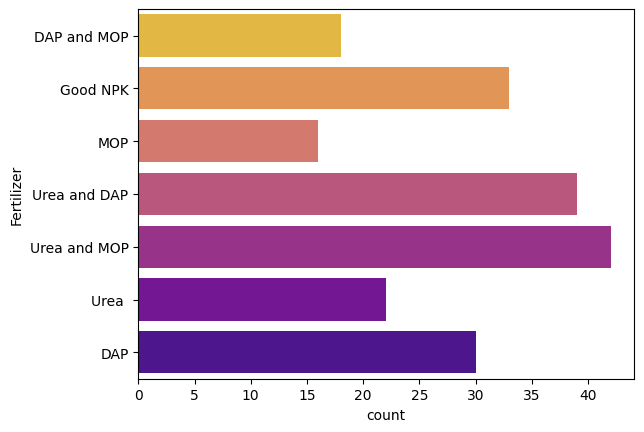

In [97]:
#Visualization of the class in Fertilizer category with countplot
sns.countplot(y='Fertilizer',data=df,palette="plasma_r")

In [98]:
# Defining function for Continuous variable and their relationship with target variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Distogram')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = df['Fertilizer'])

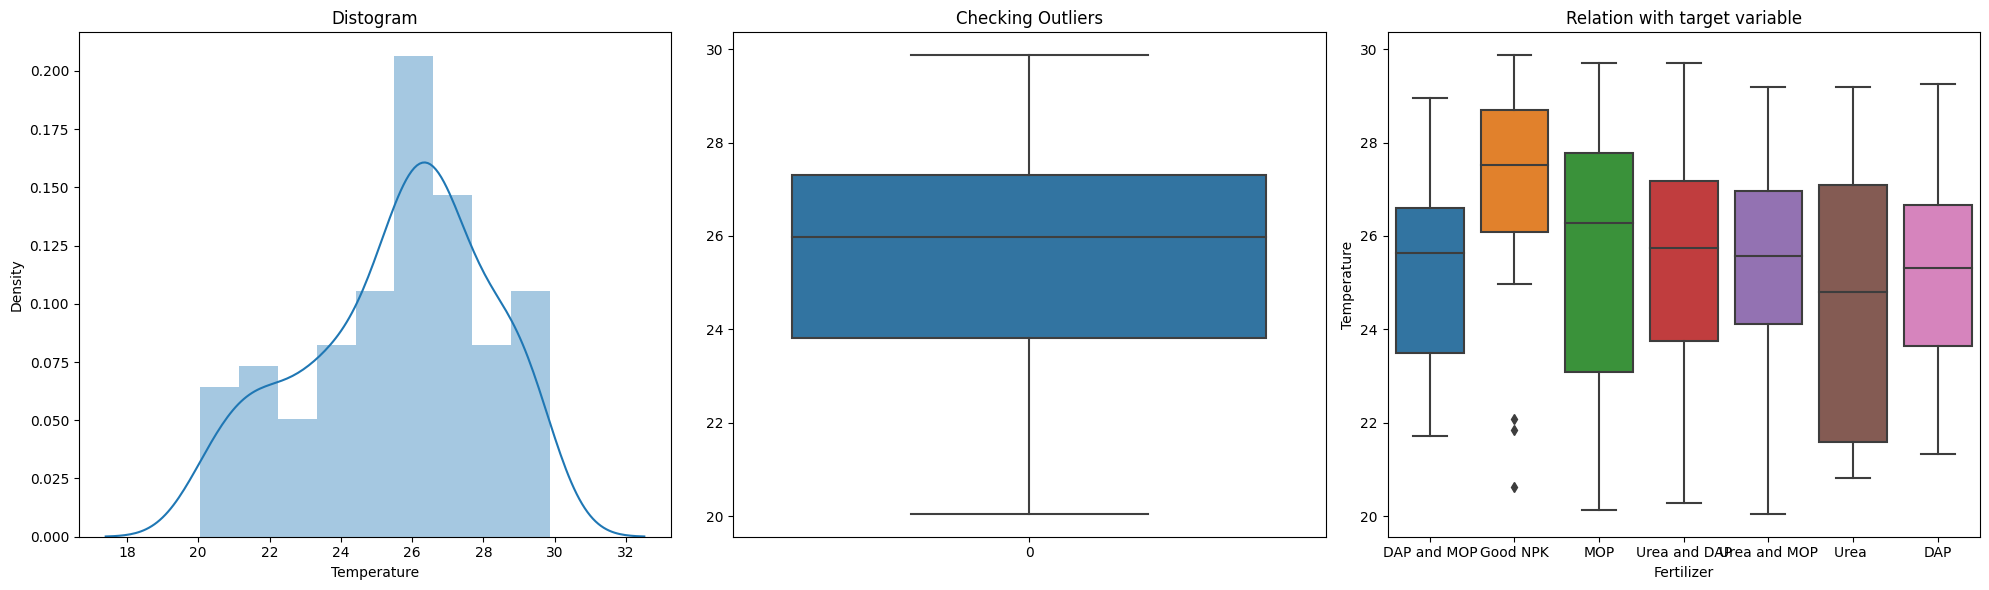

In [99]:
# EDA - Temparature variable
plot_conti(df['Temperature'])

In [100]:
# Defining function to visualize catogorical variable and their relationship with target variable
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer'], ax=axes[1])

In [101]:
# print the unique types of the Soil
print("Soil : ", df['Soil'].unique())

Soil :  ['Clayey' 'laterite' 'silty clay' 'sandy' 'coastal' 'clay loam' 'alluvial']


In [102]:
# print the unique types of the Crop
print("Crop: ", df['Crop'].unique())

Crop:  ['rice' 'Coconut']


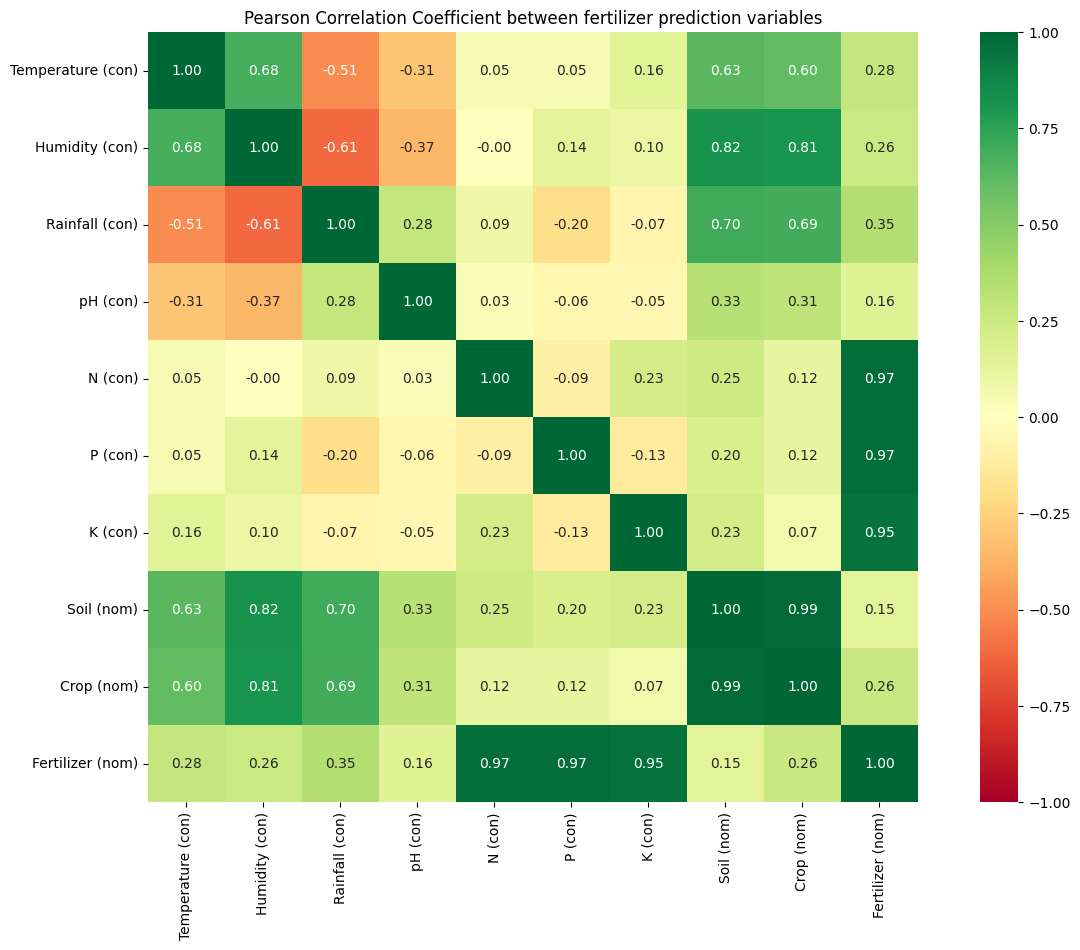

{'corr':                    Temperature (con)  Humidity (con)  Rainfall (con)   
 Temperature (con)           1.000000        0.683385       -0.505754  \
 Humidity (con)              0.683385        1.000000       -0.614205   
 Rainfall (con)             -0.505754       -0.614205        1.000000   
 pH (con)                   -0.305519       -0.365192        0.282530   
 N (con)                     0.052297       -0.002303        0.086501   
 P (con)                     0.052717        0.136661       -0.200266   
 K (con)                     0.155975        0.104165       -0.070109   
 Soil (nom)                  0.628264        0.816603        0.700433   
 Crop (nom)                  0.603367        0.807215        0.689128   
 Fertilizer (nom)            0.276094        0.255053        0.350946   
 
                    pH (con)   N (con)   P (con)   K (con)  Soil (nom)   
 Temperature (con) -0.305519  0.052297  0.052717  0.155975    0.628264  \
 Humidity (con)    -0.365192 -0.002303 

In [103]:
#To find out correlation with both nominal and numeric variables
nominal.associations(df,figsize=(16,10),
                     mark_columns=True,
                     title="Pearson Correlation Coefficient between fertilizer prediction variables",
                     cmap='RdYlGn')

In [104]:
from sklearn.preprocessing import MinMaxScaler # to normalize data
from sklearn.preprocessing import LabelEncoder # to encode object variable to numeric
from sklearn.model_selection import train_test_split # to split data into training and testing sets

In [105]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Assuming you have a DataFrame named 'df' and you want to encode specific columns
columns_to_encode = ['Fertilizer', 'Soil', 'Crop']

# Loop through each column and perform label encoding
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

# Now, the specified columns in 'df' have been encoded

In [106]:
! pip install --upgrade scikit-learn

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [107]:
# normalize the feature(X) columns 
scaler = MinMaxScaler()
X = df.drop(['Fertilizer'], axis=1) #feature variables
y = df[['Fertilizer']] #Target variable

for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])


display(X)

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop
0,0.490835,0.136959,0.982385,0.552448,0.909091,0.00,0.285714,0.000000,1.0
1,0.879837,0.832326,0.285842,0.374126,0.909091,1.00,1.000000,0.666667,0.0
2,0.022403,0.076536,0.832089,0.000000,0.909091,1.00,0.047619,1.000000,1.0
3,0.511202,0.750252,0.369081,0.188811,0.000000,0.05,0.761905,0.833333,0.0
4,0.508147,0.794562,0.261002,0.409091,0.000000,0.95,0.095238,0.500000,0.0
...,...,...,...,...,...,...,...,...,...
195,0.359470,0.174723,0.956649,0.293706,0.909091,0.00,0.523810,1.000000,1.0
196,0.571283,0.168681,0.515256,0.737762,0.000000,0.95,0.095238,0.000000,1.0
197,0.419552,0.181772,0.752015,0.199301,0.000000,0.05,0.761905,1.000000,1.0
198,0.629328,0.187311,0.928047,0.185315,1.000000,0.15,0.619048,1.000000,1.0


In [108]:
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of y_train is', y_train.shape)
print('Shape of y_test is',  y_test.shape)
display(X_train)
display(y_train)

Shape of X_train is (140, 9)
Shape of X_test is (60, 9)
Shape of y_train is (140, 1)
Shape of y_test is (60, 1)


,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop
96,0.680244,0.084089,0.891563,1.000000,1.000000,0.15,0.619048,0.333333,1.0
7,0.655804,0.002014,0.667403,0.688811,1.000000,0.15,0.619048,0.000000,1.0
149,0.637475,0.931521,0.459963,0.276224,0.909091,0.00,0.285714,0.500000,0.0
42,0.008147,0.074522,0.785992,0.916084,0.909091,1.00,0.047619,0.000000,1.0
65,0.267821,0.168177,0.377262,0.555944,0.909091,0.00,0.285714,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
180,0.322811,0.146526,0.538126,0.465035,0.000000,1.00,0.095238,0.000000,1.0
164,0.687373,0.038771,0.915686,0.034965,0.227273,1.00,0.047619,0.000000,1.0
36,0.767821,0.622860,0.189586,0.419580,0.909091,1.00,1.000000,0.833333,0.0
107,0.512220,0.020141,0.751836,0.968531,1.000000,0.15,0.619048,1.000000,1.0


,Fertilizer
96,0
7,0
149,1
42,3
65,1
...,...
180,6
164,6
36,2
107,0


In [109]:
# Importing libraries for classification and performance evaluation
from sklearn.neighbors import KNeighborsClassifier #to build KNeighbors model
from sklearn.ensemble import GradientBoostingClassifier #to build GradientBoosting model
from sklearn.ensemble import RandomForestClassifier #to build RandomForest model
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import GridSearchCV # to best select hyperparameter

from sklearn.metrics import accuracy_score, classification_report # to calcutate accuracy of model
from sklearn.metrics import classification_report #to calculte precision, recall, f1-score
from sklearn.metrics import ConfusionMatrixDisplay

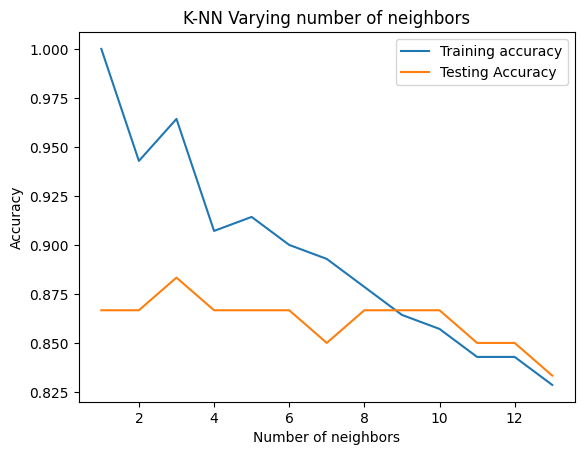

In [110]:
# To determine the k value with highest accuracy
neighbors = np.arange(1,14)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [111]:
# Create K-Nearest Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model_knn = model_knn.fit(X_train, y_train)

In [112]:
y_pred_knn = model_knn.predict(X_test)

In [113]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy of K-Nearest Neighbor Model: ', accuracy_score(y_test, y_pred_knn))

Accuracy of K-Nearest Neighbor Model:  0.8833333333333333


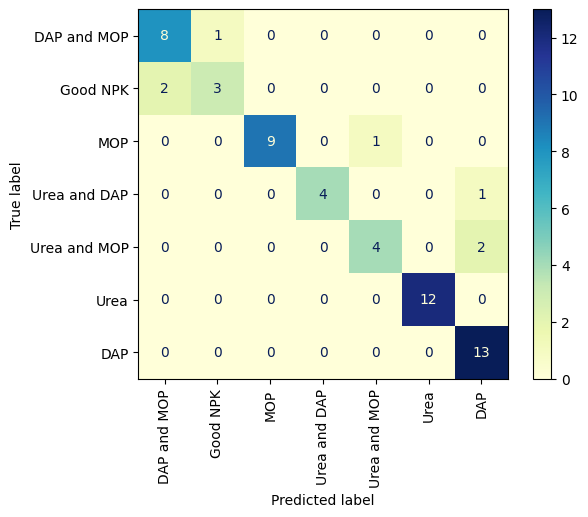

In [114]:
## To visualize confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have your model 'model_knn', X_test, and y_test
y_pred = model_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'])
disp.plot(cmap='YlGnBu', xticks_rotation='vertical')
plt.show()



In [115]:
#Classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.75      0.60      0.67         5
           2       1.00      0.90      0.95        10
           3       1.00      0.80      0.89         5
           4       0.80      0.67      0.73         6
           5       1.00      1.00      1.00        12
           6       0.81      1.00      0.90        13

    accuracy                           0.88        60
   macro avg       0.88      0.84      0.85        60
weighted avg       0.89      0.88      0.88        60



In [116]:
#Decision Tree model
#random state (int): Controls the randomness of the estimator for reproducibility
model_DT = DecisionTreeClassifier(random_state=42)

# Train the model using the training sets
model_DT = model_DT.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_DT = model_DT.predict(X_test)

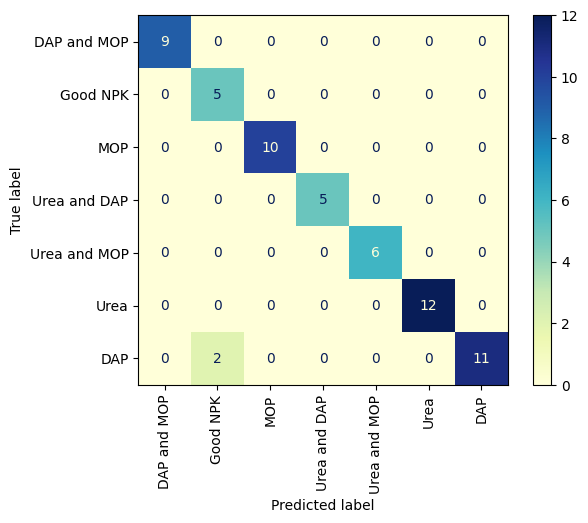

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have your model 'model_DT', X_test, and y_test
y_pred = model_DT.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'])

# Plot the confusion matrix
disp.plot(cmap='YlGnBu', xticks_rotation='vertical')
plt.show()

In [118]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))
#Classification report
print(classification_report(y_test, y_pred_DT))

Accuracy:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      0.85      0.92        13

    accuracy                           0.97        60
   macro avg       0.96      0.98      0.96        60
weighted avg       0.98      0.97      0.97        60



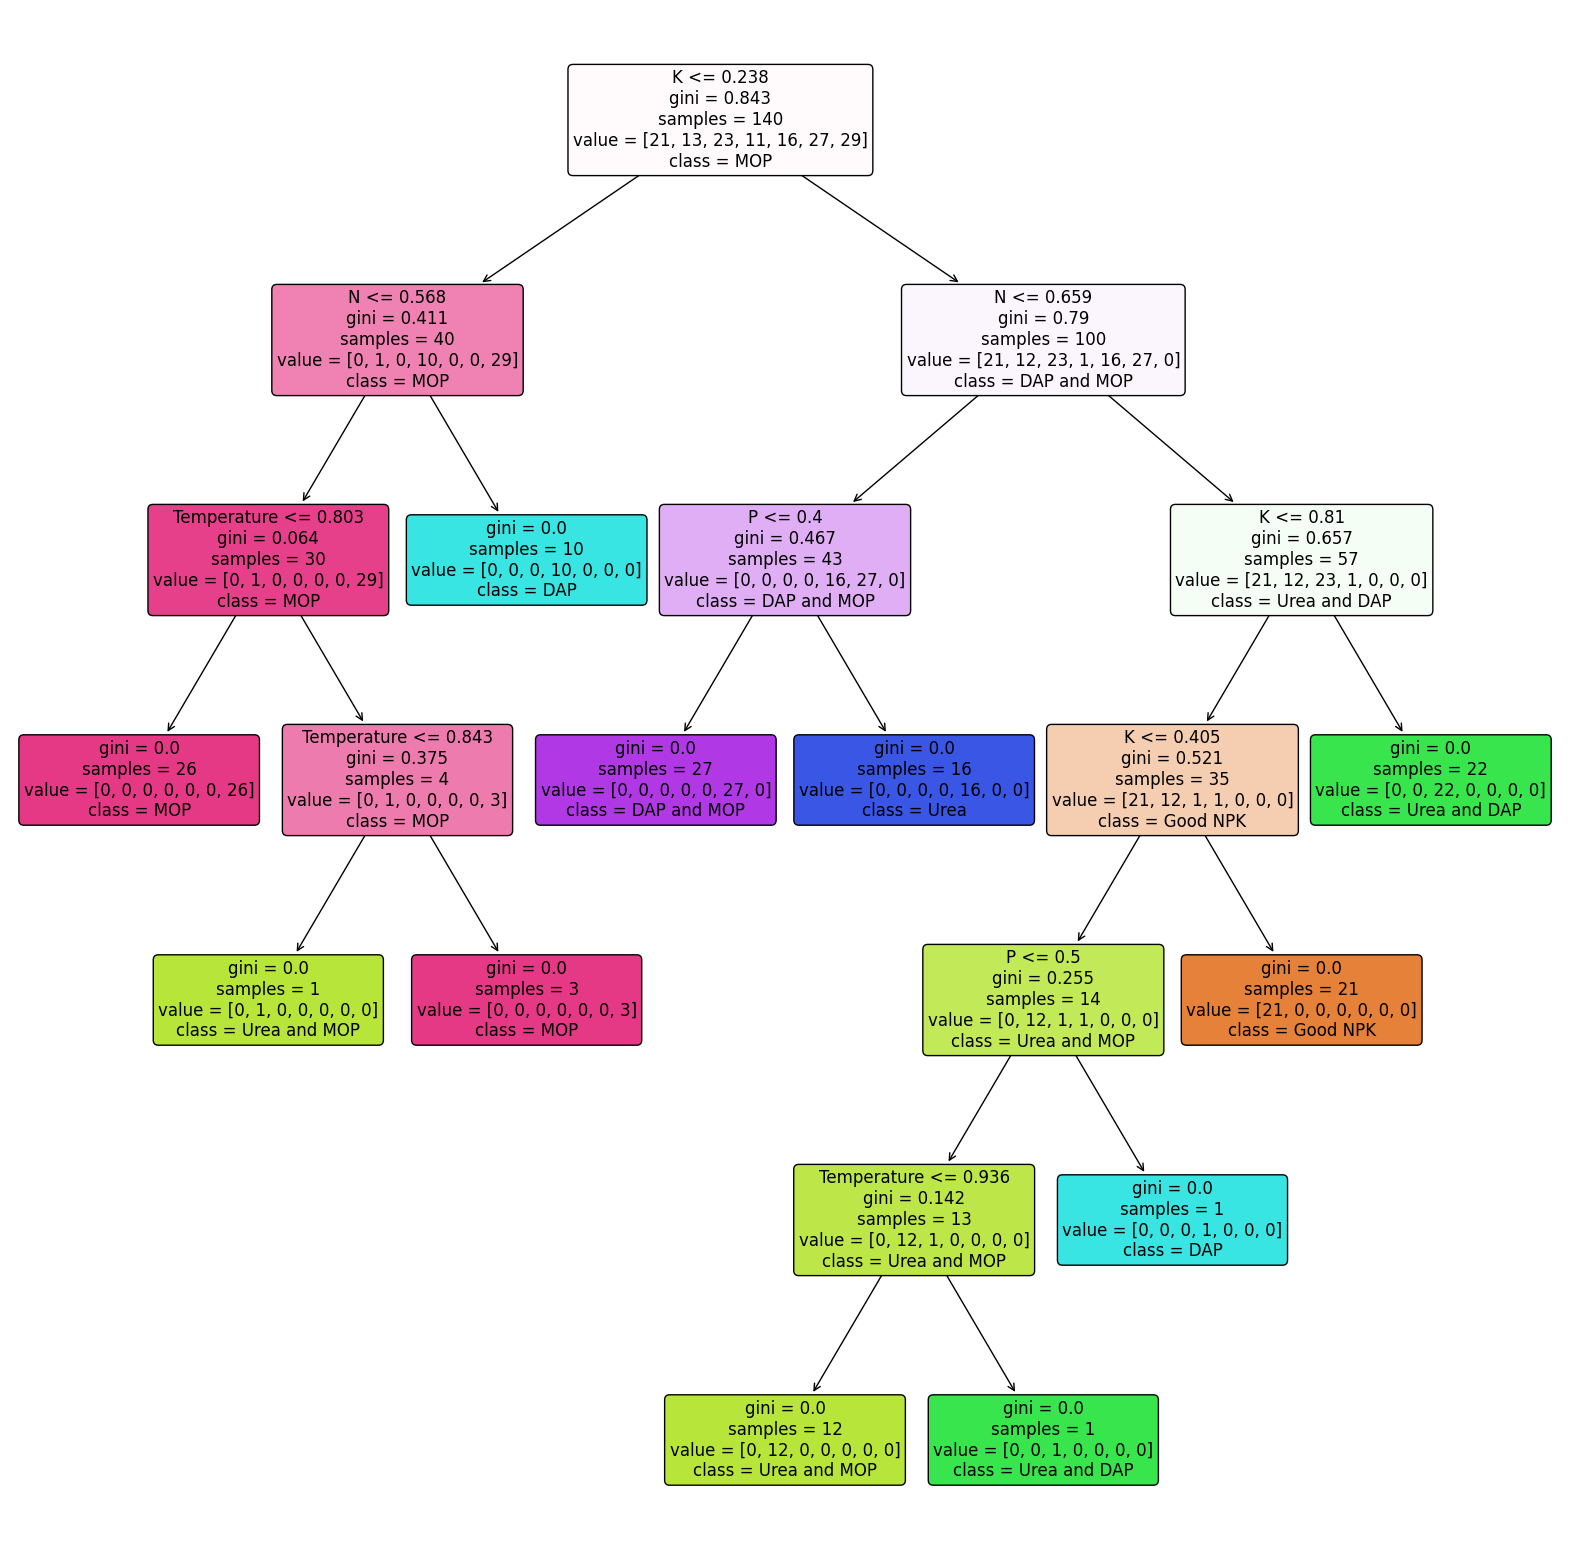

In [119]:
# Visualizing Decision Tree
plt.figure(figsize = (20, 20))
plot_tree(model_DT,
        filled=True,
        rounded=True,
        class_names = ['Good NPK', 'Urea and MOP','Urea and DAP', 'DAP','Urea', 'DAP and MOP', 'MOP'],
        feature_names = X.columns,
        fontsize=12)

plt.show()

In [120]:
# Hyperparameters
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

# GridSearchCV: to find the best hyperparameters based on the scoring method
#CV: Cross validation
grid_search_DT = GridSearchCV(estimator=model_DT,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

In [121]:
# fit the model with the best hyper-parameters
grid_result_DT = grid_search_DT.fit(X_train, y_train)

In [122]:
# Best hyperparameters in the grid search
grid_result_DT.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [123]:
#Cross validation result
cv_result = pd.DataFrame(grid_result_DT.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,entropy,4,1.000000,1.000000,0.964286,0.928571,1.000000,0.978571,0.028571,1
7,entropy,5,1.000000,1.000000,0.964286,0.928571,1.000000,0.978571,0.028571,1
8,entropy,6,1.000000,1.000000,0.964286,0.928571,1.000000,0.978571,0.028571,1
9,entropy,7,1.000000,1.000000,0.964286,0.928571,1.000000,0.978571,0.028571,1
1,gini,4,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
2,gini,5,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
3,gini,6,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
4,gini,7,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
5,entropy,3,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
0,gini,3,0.785714,0.892857,0.785714,0.750000,0.928571,0.828571,0.069253,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [124]:
#Prediction
y_pred_Grid = grid_result_DT.predict(X_test)

In [125]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_Grid))

#Classification report
print(classification_report(y_test, y_pred_Grid))

Accuracy:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      0.85      0.92        13

    accuracy                           0.97        60
   macro avg       0.96      0.98      0.96        60
weighted avg       0.98      0.97      0.97        60



In [126]:
#Random Forest model
model_RF = RandomForestClassifier(random_state=42)

# Train the model using the training sets
model_RF = model_RF.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_RF = model_RF.predict(X_test)

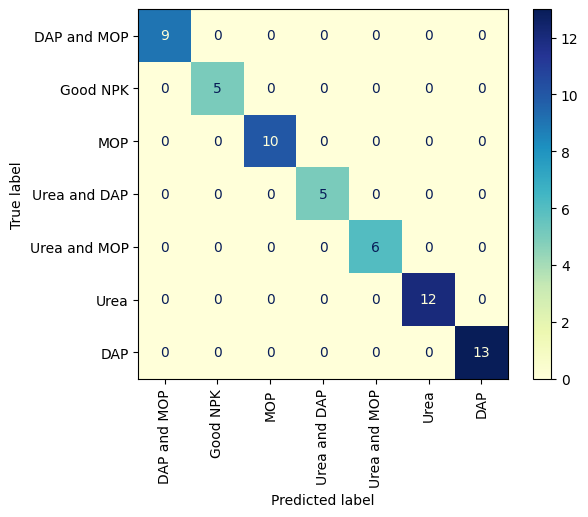

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have your model 'model_RF', X_test, and y_test
y_pred = model_RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'])

# Plot the confusion matrix
disp.plot(cmap='YlGnBu', xticks_rotation='vertical')
plt.show()

In [128]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_RF))

#Classification report
print(classification_report(y_test, y_pred_RF))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        13

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [129]:
#Gradient Boosting model
model_GB = GradientBoostingClassifier()

# Train the model using the training sets
model_GB = model_GB.fit(X_train, y_train)

In [130]:
#Predict the response for test dataset
y_pred_GB = model_GB.predict(X_test)

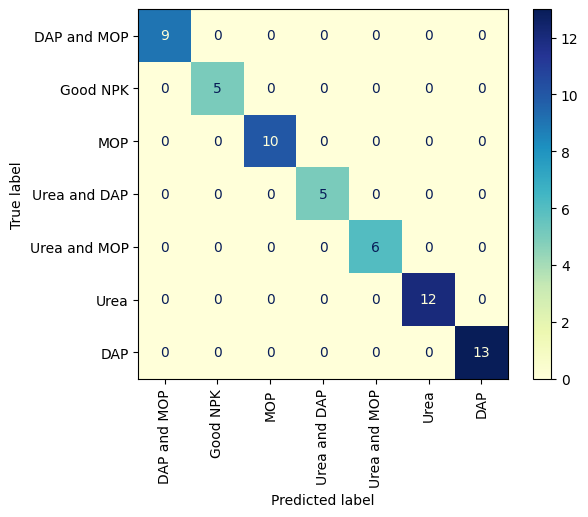

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have your model 'model_GB', X_test, and y_test
y_pred = model_GB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'])

# Plot the confusion matrix
disp.plot(cmap='YlGnBu', xticks_rotation='vertical')
plt.show()

In [132]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_GB))

#Classification report
print(classification_report(y_test, y_pred_GB))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        13

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [133]:
print("Model\t\t\tAccuracy of the model")
print("""K-Nearest Neighbors\t\t {:.4f}""".format( accuracy_score(y_test, y_pred_knn)))
print("""Decision Tree\t\t\t {:.4f}""".format(accuracy_score(y_test, y_pred_DT)))
print("""Random Forest\t\t\t {:.4f}""".format(accuracy_score(y_test, y_pred_RF)))
print("""Gradient Boosting\t\t {:.4f}""".format( accuracy_score(y_test, y_pred_GB)))

Model			Accuracy of the model
K-Nearest Neighbors		 0.8833
Decision Tree			 0.9667
Random Forest			 1.0000
Gradient Boosting		 1.0000


In [134]:
df

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,0,1,1
1,28.69,96.65,178.96,6.08,4.0,4.0,4.0,4,0,2
2,20.27,81.64,270.44,5.01,4.0,4.0,2.0,6,1,3
3,25.07,95.02,192.90,5.55,2.0,2.1,3.5,5,0,5
4,25.04,95.90,174.80,6.18,2.0,3.9,2.1,3,0,6
...,...,...,...,...,...,...,...,...,...,...
195,23.58,83.59,291.30,5.85,4.0,2.0,3.0,6,1,0
196,25.66,83.47,217.38,7.12,2.0,3.9,2.1,0,1,6
197,24.17,83.73,257.03,5.58,2.0,2.1,3.5,6,1,5
198,26.23,83.84,286.51,5.54,4.2,2.3,3.2,6,1,0


In [135]:
#For K-Nearest Neighbours model
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = model_knn.predict(data)
print(prediction)

[6]


In [136]:
#For Decesion Tree model
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = grid_result_DT.predict(data)
print(prediction)

[2]


In [137]:
#For Random Forest model
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = model_RF.predict(data)
print(prediction)

[2]


In [138]:
##For Gradient Boosting model
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = model_GB.predict(data)
print(prediction)

[2]
